In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
plt.style.use('ggplot')

In [2]:
diri = '../dataset/'
fili = [os.path.join(diri,x) for x in os.listdir(diri) if x.endswith('.csv')]

In [81]:
# OBS
df_obs = pd.read_csv(fili[0], skiprows=1)
df_obs['date'] = pd.to_datetime(df_obs['date'], format='%m/%d/%Y')
df_obs = df_obs.melt(id_vars='date', var_name='ZONE',value_name='OBS')
df_obs = df_obs.apply(lambda x: x.replace({'SJL':'ESTE','CRB':'NORTE','CDM':'CENTRO'}) if x.name=='ZONE' else x)
df_obs['OBS'] = df_obs['OBS'].apply(lambda x: 'buena' if (x>0 and x<=12) else 'moderado' if (x>12 and x<=35.4) else 'insalubre')
# MODEL
df_model = pd.read_csv(fili[1], skiprows=3)
df_model = df_model.rename(columns={'Fecha':'date'})
df_model['date'] = pd.date_range('2020-09-01',freq='1D', periods=len(df_model))
df_model = df_model.melt(id_vars='date',var_name='ZONE', value_name='MODEL')
df_model = df_model.apply(lambda x: x.str.strip('Zona ').str.upper() if x.name=='ZONE' else x)
df_model['ZONE'] = df_model['ZONE'].str.replace('CENTR','CENTRO')

In [83]:
df_merged = pd.merge(df_model,df_obs,on=['date','ZONE'])
df_merged['eval'] = df_merged.apply(lambda x: x['MODEL']==x['OBS'], axis=1)
df_merged['eval'] = df_merged['eval'].apply(lambda x: 'Acierto' if x==True else 'Desacierto')

Text(0.5, 1.0, 'PM2.5 evaluación pronostico')

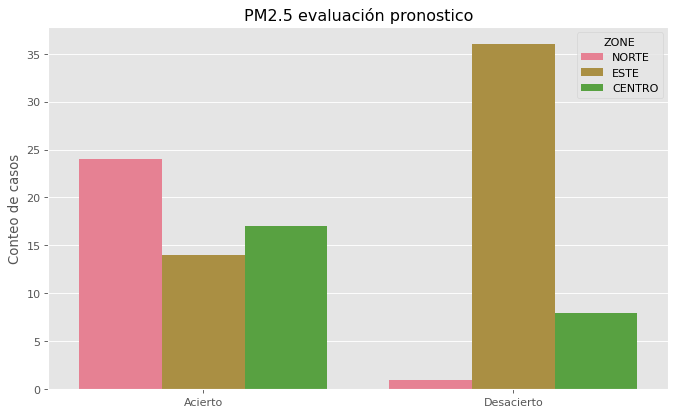

In [98]:
fig, ax = plt.subplots(figsize=(10,6), dpi=80)
sns.countplot(df_merged['eval'],ax=ax, hue=df_merged['ZONE'],palette=sns.color_palette("husl"))
ax.set_ylabel('Conteo de casos')
ax.set_xlabel('')
ax.set_title('PM2.5 evaluación pronostico')

In [62]:
df_merged.head(40)

,date,ZONE,MODEL,OBS,eval
0,2020-09-01,NORTE,moderado,moderado,Acierto
1,2020-09-02,NORTE,moderado,moderado,Acierto
2,2020-09-03,NORTE,moderado,moderado,Acierto
3,2020-09-04,NORTE,moderado,moderado,Acierto
4,2020-09-05,NORTE,moderado,moderado,Acierto
5,2020-09-06,NORTE,moderado,moderado,Acierto
6,2020-09-07,NORTE,moderado,moderado,Acierto
7,2020-09-08,NORTE,moderado,moderado,Acierto
8,2020-09-09,NORTE,moderado,moderado,Acierto
9,2020-09-10,NORTE,moderado,moderado,Acierto
